In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('loan_prediction_data.xlsx')

# Display first 5 rows
print(df.head())

# Check dataset shape and missing values
print(f"Shape: {df.shape}")
print(df.isnull().sum())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


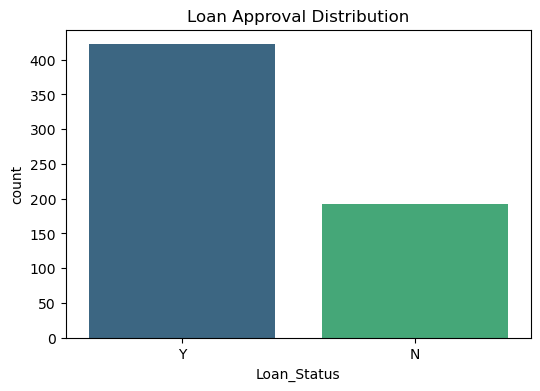

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Loan_Status', palette='viridis')
plt.title("Loan Approval Distribution")
plt.show()

# Class distribution
print(df['Loan_Status'].value_counts(normalize=True))

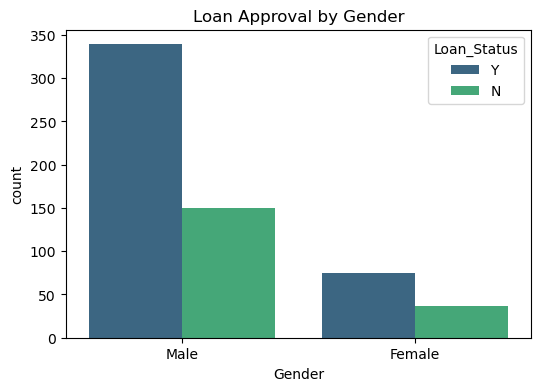

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Loan_Status', palette='viridis')
plt.title("Loan Approval by Gender")
plt.show()

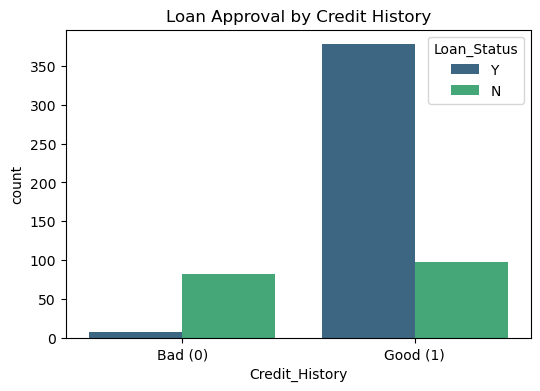

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Credit_History', hue='Loan_Status', palette='viridis')
plt.title("Loan Approval by Credit History")
plt.xticks([0, 1], ['Bad (0)', 'Good (1)'])
plt.show()

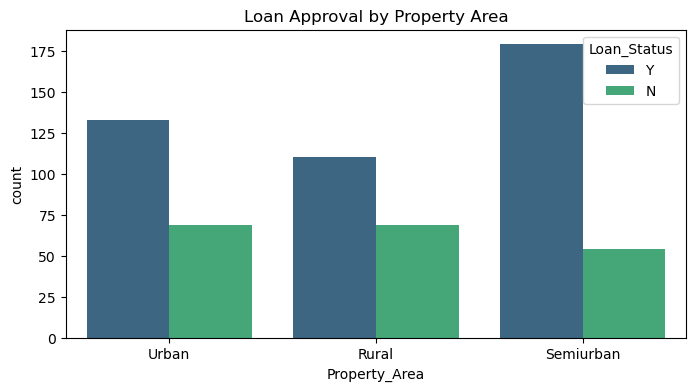

In [20]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Property_Area', hue='Loan_Status', palette='viridis')
plt.title("Loan Approval by Property Area")
plt.show()

C:\Users\Rima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


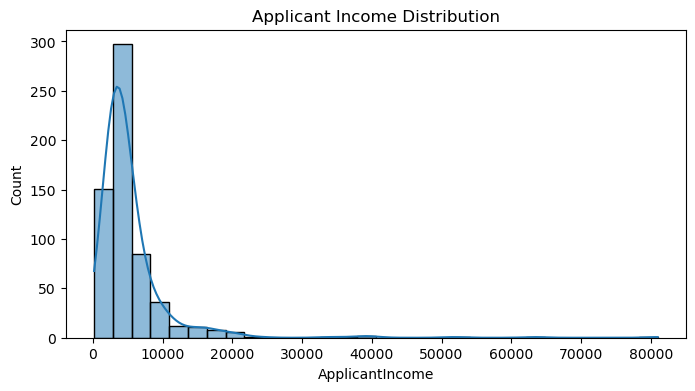

In [21]:
plt.figure(figsize=(8, 4))
sns.histplot(df['ApplicantIncome'], kde=True, bins=30)
plt.title("Applicant Income Distribution")
plt.show()

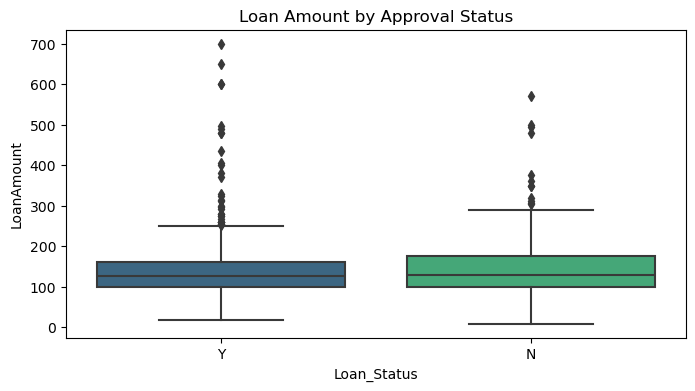

In [22]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Loan_Status', y='LoanAmount', palette='viridis')
plt.title("Loan Amount by Approval Status")
plt.show()

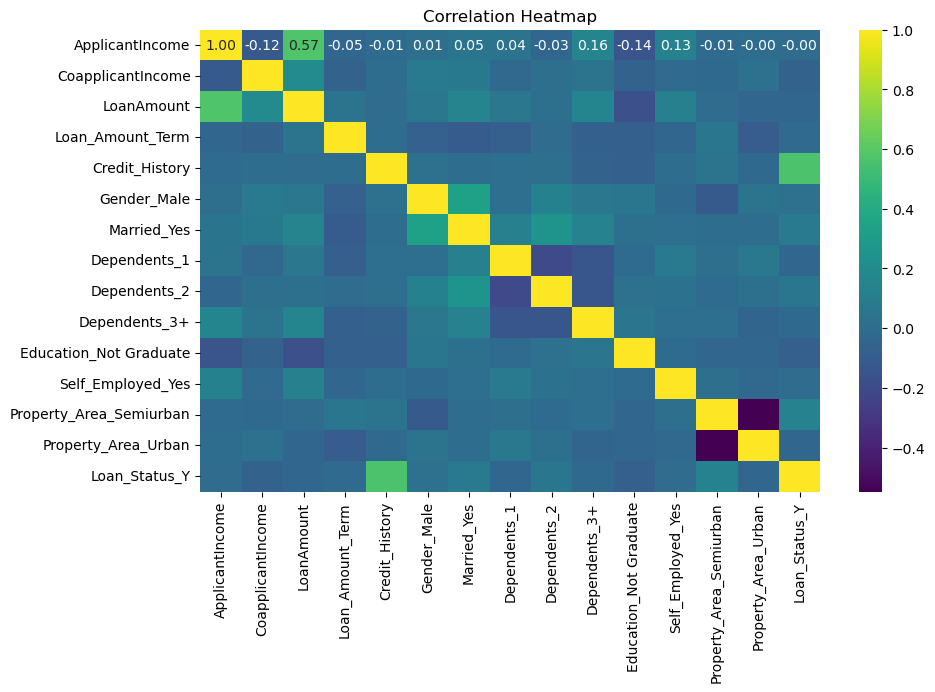

In [23]:
# Encode categorical variables for correlation
df_encoded = pd.get_dummies(df.drop('Loan_ID', axis=1), drop_first=True)

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

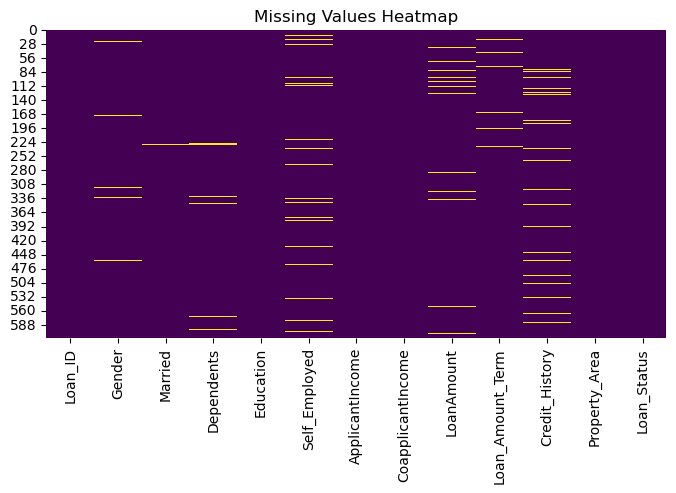

In [24]:
# Visualize missing values
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [25]:
Data Processing


SyntaxError: invalid syntax (1017450373.py, line 1)

In [26]:
# Fill numerical missing values with median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

# Fill categorical missing values with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [28]:
from sklearn.preprocessing import LabelEncoder

# Drop Loan_ID (non-predictive)
df.drop('Loan_ID', axis=1, inplace=True)

# Label encode binary categorical variables
label_encoder = LabelEncoder()
binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

# One-hot encode nominal variables (Property_Area)
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)

# Convert Dependents to ordinal (0, 1, 2, 3)
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

In [29]:
import numpy as np

In [30]:
# Create TotalIncome 
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Log-transform skewed features (ApplicantIncome, LoanAmount)
df['ApplicantIncome'] = np.log1p(df['ApplicantIncome'])
df['LoanAmount'] = np.log1p(df['LoanAmount'])

In [31]:
 
print(df[['ApplicantIncome', 'CoapplicantIncome', 'TotalIncome']].corr())  

                   ApplicantIncome  CoapplicantIncome  TotalIncome
ApplicantIncome            1.00000          -0.237860     0.640090
CoapplicantIncome         -0.23786           1.000000     0.342781
TotalIncome                0.64009           0.342781     1.000000


In [32]:
from sklearn.model_selection import train_test_split

X = df.drop(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Status'], axis=1) 
y = df['Loan_Status']

# Split with stratification to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Train model with class weights (to handle imbalance)
lr = LogisticRegression(class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]

# Evaluate
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_lr):.2f}")

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.73      0.71      0.72        38
           1       0.87      0.88      0.88        85

    accuracy                           0.83       123
   macro avg       0.80      0.80      0.80       123
weighted avg       0.83      0.83      0.83       123

ROC-AUC: 0.87


In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100, class_weight='balanced', random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_rf):.2f}")

Random Forest Results:
              precision    recall  f1-score   support

           0       0.79      0.61      0.69        38
           1       0.84      0.93      0.88        85

    accuracy                           0.83       123
   macro avg       0.82      0.77      0.78       123
weighted avg       0.83      0.83      0.82       123

ROC-AUC: 0.82


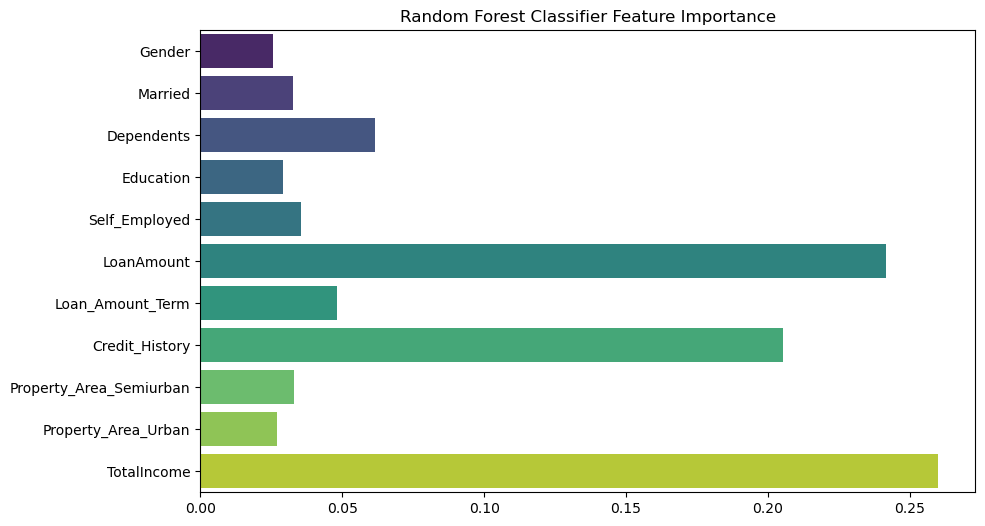

In [37]:
# Plot feature importance for randomforest
plt.figure(figsize=(10, 6))
sns.barplot(x=rf.feature_importances_, y=X.columns, palette='viridis')
plt.title("Random Forest Classifier Feature Importance")
plt.show()

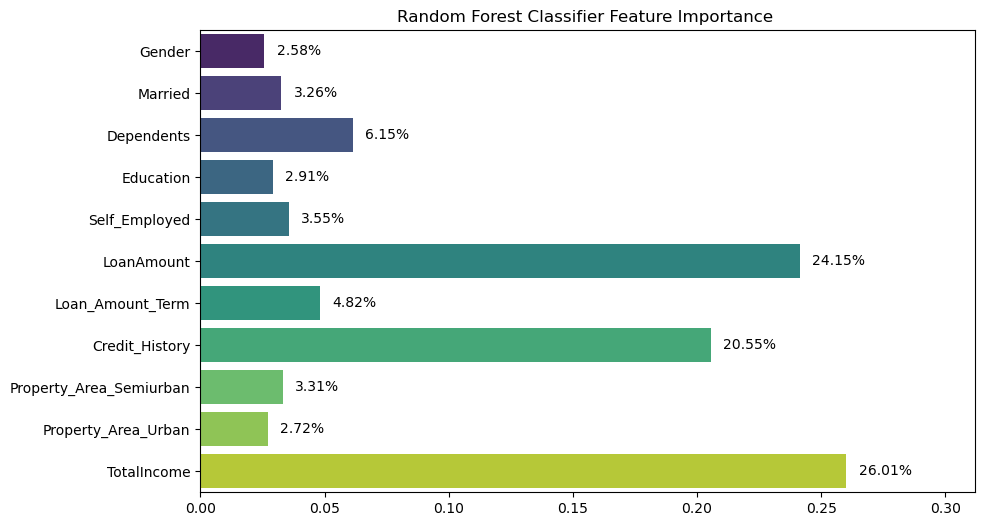

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance for RandomForest
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=rf.feature_importances_, y=X.columns, palette='viridis')

# Add percentage annotations to each bar
for index, value in enumerate(rf.feature_importances_):
    percentage = f"{value * 100:.2f}%"  # Format to 2 decimal places
    plt.text(
        value + 0.005,  # Shift text slightly to the right of the bar
        index,          # y-position aligns with the bar
        percentage,
        va='center',    # Vertical alignment to center
        ha='left',      # Horizontal alignment to left
        fontsize=10,
        color='black'
    )

plt.title("Random Forest Classifier Feature Importance ")
plt.xlim(0, rf.feature_importances_.max() * 1.2)  # Extend x-axis for text visibility
plt.show()